In [11]:
import time
from election_functions import ElectionGame
from eraser import Eraser
from election_functions import get_election_results, get_reward_matrices, get_rep_states, get_dem_states
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm

In [12]:
# Select Election Year
election_year = 2016

payoff_df = pd.DataFrame()

# Generate Reward Functions
clean_election_results, state_list, electoral_votes = get_election_results(election_year)
republican_states = get_rep_states(clean_election_results, state_list)
democrat_states = get_dem_states(clean_election_results, state_list)

# define attacker types here
attack_targets_list = [[state_list],
                       [republican_states],
                       [democrat_states],
                       [state_list, republican_states, democrat_states]]

partisan_type_list = [[False],
                      [True],
                      [True],
                      [False,True,True]]

description_list = ['publicity_hacker','democrat_hacker','republican_hacker','mixed_hackers']


In [13]:
for a in tqdm(range(4)):
    attack_list = attack_targets_list[a]
    partisan_type = partisan_type_list[a]
    # Get reward matrices
    att_reward_array, def_reward_array = get_reward_matrices(clean_election_results, state_list, attack_list, electoral_votes, partisan_type)

    payoffs = []
    for i in range(51):
        sec_game = ElectionGame(max_coverage=i+1, num_attacker_types=len(
            attack_list), att_reward=att_reward_array, def_reward=def_reward_array)
        eraser_solver = Eraser(sec_game)
        eraser_solver.solve()
        payoffs.append(eraser_solver.opt_defender_payoff)
    payoff_df[description_list[a]] = payoffs

100%|██████████| 4/4 [00:07<00:00,  1.75s/it]


In [19]:
payoff_df

,publicity_hacker,democrat_hacker,republican_hacker,mixed_hackers
0,10.3886,0.268434,7.76001,10.3886
1,17.9481,1.423680,15.03450,17.9481
2,19.2542,2.213560,17.32560,19.2542
3,20.1252,2.649810,18.72670,20.1252
4,20.7567,2.955970,19.98410,20.7567
5,21.2889,3.202700,20.91330,21.2889
6,21.7828,3.417150,21.72730,21.7828
7,22.1829,3.612740,22.43070,22.1829
8,22.4962,3.760060,22.96560,22.4962
9,22.7526,3.884140,23.37070,22.7526


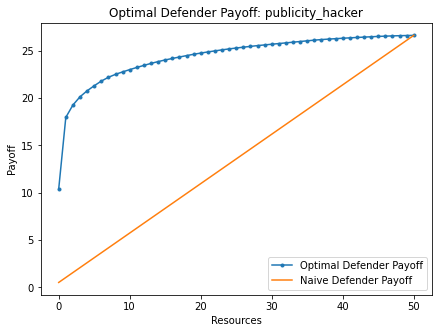

In [26]:
hacker_type = 'publicity_hacker'
plt.rcParams['figure.figsize']=(7,5)
plt.plot(range(51),payoff_df[hacker_type],'.-')
plt.plot(range(51), 26.6116 * np.arange(1,52)/51)
plt.legend(['Optimal Defender Payoff', 'Naive Defender Payoff'])
plt.title('Optimal Defender Payoff: '+hacker_type)
plt.xlabel('Resources')
plt.ylabel('Payoff')
plt.savefig('payoff1.png', dpi = 300)

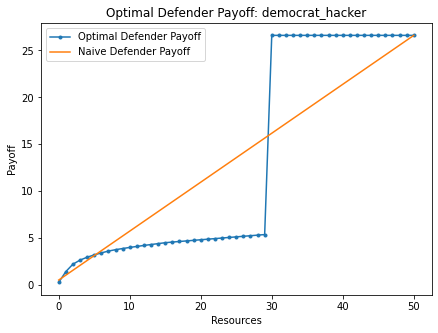

In [27]:
hacker_type = 'democrat_hacker'
plt.rcParams['figure.figsize']=(7,5)
plt.plot(range(51),payoff_df[hacker_type],'.-')
plt.plot(range(51), 26.6116 * np.arange(1,52)/51)
plt.legend(['Optimal Defender Payoff', 'Naive Defender Payoff'])
plt.title('Optimal Defender Payoff: '+hacker_type)
plt.xlabel('Resources')
plt.ylabel('Payoff')
plt.savefig('payoff2.png', dpi = 300)

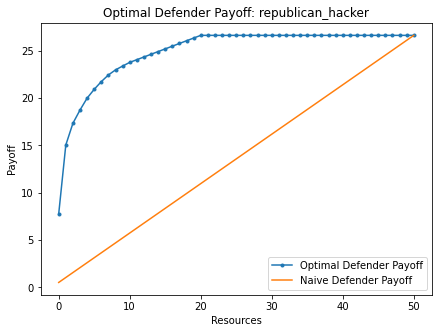

In [28]:
hacker_type = 'republican_hacker'
plt.rcParams['figure.figsize']=(7,5)
plt.plot(range(51),payoff_df[hacker_type],'.-')
plt.plot(range(51), 26.6116 * np.arange(1,52)/51)
plt.legend(['Optimal Defender Payoff', 'Naive Defender Payoff'])
plt.title('Optimal Defender Payoff: '+hacker_type)
plt.xlabel('Resources')
plt.ylabel('Payoff')
plt.savefig('payoff3.png', dpi = 300)

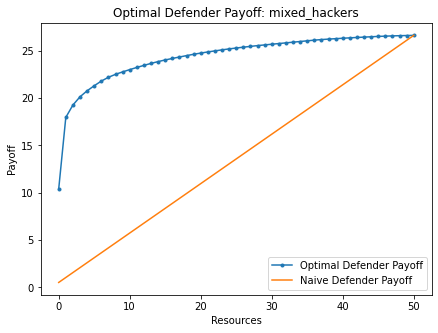

In [29]:
hacker_type = 'mixed_hackers'
plt.rcParams['figure.figsize']=(7,5)
plt.plot(range(51),payoff_df[hacker_type],'.-')
plt.plot(range(51), 26.6116 * np.arange(1,52)/51)
plt.legend(['Optimal Defender Payoff', 'Naive Defender Payoff'])
plt.title('Optimal Defender Payoff: '+hacker_type)
plt.xlabel('Resources')
plt.ylabel('Payoff')
plt.savefig('payoff4.png', dpi = 300)